# Short overview: Simple Kriging

In our lecture, we disussed the basics of Simple Kriging. In this exercise, we will implement the equations for a simple three-point problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Define covariance function

Recall that the essential difference between multilinear regression and kriging is the requirement for a covariance function. So far, we did not discuss this in detail in the lecture - but the basic idea is to define a function that describes the covariance between two variables as a function of distance.

One typical example that we will use here is the exponential covariance function:

$$C(h) = \exp\left(- \frac{|h|}{a} \right)$$

where $a$ is called the _range_ of the covariance function - we will talk about its meaning in detail in the class. $h$ is the distance between a given pair of points.

<div class='alert alert-info'>
    
**Your task**: As a first step, complete the function below to implement this equation with $a$ defaulting to $a = 1$:

</div>

In [2]:
def cov(h, a=1):
    # YOUR CODE HERE
    c=np.exp((-(abs(h))/a))
    return c

<div class='alert alert-info'>
    
**Your task**: Create now a plot to visualize this function for a range of $h$-values between 0-3:
</div>


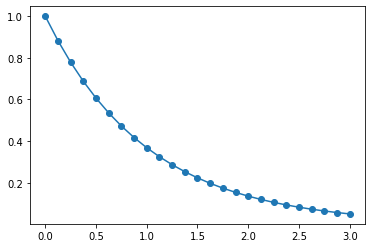

In [3]:
# YOUR CODE HERE
h= np.linspace(0,3,25)
x = cov(h)
plt.plot(h,x, marker='o');

## Step 2: Implement Simple Kriging for three points

Now that we have this function, we can use it to implement our first spatial estimation using Simple Kriging! We will first start with a simple case: consider we have a 1-D system with three points with known values $x_1, x_2, x_3$ and we would like to estimate the value at a point $x_0$.

Here are the steps you need to perform:

1. Create the covariance matrices C (covariances between all input locations) and c (covariances between input locations and unknown location):

$$ C = \begin{pmatrix}cov(0) & cov(h_{12}) & cov(h_{13})\\\ cov(h_{21}) & cov(0) & cov(h_{23}) \\\ cov(h_{31}) & cov(h_{32}) & cov(0)\end{pmatrix}$$

$$ c = \begin{pmatrix}cov(h_{01}) \\\ cov(h_{02}) \\\ cov(h_{03}) \end{pmatrix}$$

2. Solve the SAE to retrieve the weights:

$$C \omega = c$$

3. Calculate the estimate at unknown position using the following equation (SK estimator):

$$ Z^*_{\omega_{SK}}(x_0)= \mu+\sum_{i=1}^{n}\omega_i (Z(x_i) - \mu)$$

<div class='alert alert-info'>
    
**Your task**: Complete the function below to perform Simple Kriging for three given values:
</div>

In [4]:
def simple_kriging(x_pos, pos, vals, cf):
    """Perform simple kriging estimation
    
    **Arguments**:
        x_pos: array of positions of three known values
        pos: x-position of unknown value
        vals: array of measurements (according to positions)
        cov: covariance function (Note: you can pass a function as an argument!)
    """
    # YOUR CODE HERE
    C=np.ones((3,3))
    C[0,1]=cov(x_pos[0]-x_pos[1])
    C[0,2]=cov(x_pos[0]-x_pos[2])
    C[1,0]=cov(x_pos[1]-x_pos[0])
    C[1,2]=cov(x_pos[1]-x_pos[2])
    C[2,0]=cov(x_pos[2]-x_pos[0])
    C[2,1]=cov(x_pos[2]-x_pos[1])
    
    c = np.array([cov(x_pos[0]-pos), cov(x_pos[1]-pos), cov(x_pos[2]-pos)])
    
    w = np.linalg.solve(C,c)
    
    variance = cov(0)-np.sum(w*c)
                               
    Z = np.mean(vals) + np.sum(w*(vals-np.mean(vals)))
                               
    return Z, variance


<div class='alert alert-info'>
    
**Your task**: As a next step, try this implementation with several points:
</div>

In [5]:
# Here one example of how the input could look like
x_pos = np.array([2,4,5.])
vals = np.array([0.2,-0.4,0.3])
x_unknown = 4.5
val = simple_kriging(x_pos, x_unknown, vals, cov)[0]
print(val)

-0.0405682403308395



<div class='alert alert-info'>
    
**Your task**: Create a plot to visualize the results:
</div>

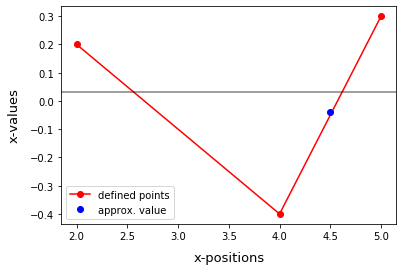

In [6]:
# YOUR CODE HERE
plt.plot(x_pos, vals, 'r-o', label='defined points')
plt.plot(x_unknown, val, 'bo', label='approx. value')
plt.axhline(np.mean(vals), color='k', alpha=0.5)
# plt.axvline(x_unknown, color='b')
plt.xlabel('x-positions', labelpad=10, fontsize=13)
plt.ylabel('x-values', labelpad=10, fontsize=13)
plt.legend(loc='lower left');

## Step 3: Variance of Simple Kriging

The variance of Simple Kriging for an estiamted location is defined as:

$$\sigma^2_{SK} = C(0) - \sum_{i=1}^{n} \omega^{SK}_i C(x_i-x_0)$$

with $C(0)$ being the variance of the dataset (which in this case are the values at the three known positions).
    

<div class='alert alert-info'>
    
**Your task**: Expand your Simple Kriging function from above to also calculate the simple kriging variance in addition to the estimate.
</div>

In [7]:
# TEST THE FUNCTION HERE (WITH ESTIMATE AND VARIANCE)
# YOUR CODE HERE
val = simple_kriging(x_pos, x_unknown, vals, cov)[1]
print(val)

0.4621171572600098


## Step 4: Expand to arbitrary number of input points

In real life we will often use datasets that contain more than three data points. So we need to expand the Kriging function in a way that works with an arbitrary number of known input points. 

Here some important things to consider when setting this up:
* How big will your matrices and vectors be?
* How can you fill them with the correct covariances (Hint: Start with a for-loop implementation)
* What happens if no input points are given? Think about the definition of SK.

<div class='alert alert-info'>
    
**Your task**: Finsih the following function to perform Simple Kriging with an arbitrary number of input points. Test your implmentation.
</div>

In [8]:
# Expansion to arbitrary number of points
# YOUR CODE HERE
def simple_kriging_arbitrary(x_pos, pos, vals, cov):
    
# x_pos: the array of known input points
# pos: the x-position of the unknown value
# vals: array of measurements (according to positions)
# cov: covariance function

    n = len(x_pos)
    C = np.ones((n,n))
    c = np.ones(n)
    for i in range(n):
        c[i] = cov(x_pos[i]-pos)
        j = 0
        while j < n:
            C[i,j] = cov(x_pos[i]-x_pos[j])
            j += 1
    
    w = np.linalg.solve(C,c)
    
    variance = cov(0)-np.sum(w*c)
                               
    Z = np.mean(vals) + np.sum(w*(vals-np.mean(vals)))
                               
    return Z, variance
    